In [76]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

### Cluster Running Workouts

In [77]:
df = pd.read_parquet('./output_files/flatfiles/runningFactsFlat.parquet.gzip', engine='pyarrow')
df.shape

(89, 107)

In [78]:
df = df.dropna()
df.shape

(71, 107)

In [79]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, 5:])

In [80]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [81]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

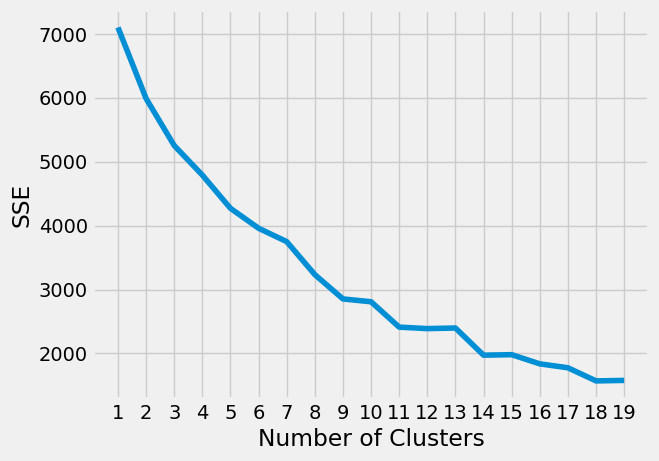

In [82]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 3000,
   "random_state": 42
   }

max_cluster = 20
# A list holds the SSE values for each k
sse = []
for k in range(1, max_cluster):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, max_cluster), sse)
plt.xticks(range(1, max_cluster))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [83]:
kl = KneeLocator(
    range(1, 20), sse, curve="convex", direction="decreasing"
    )

print(kl.elbow)

11


In [84]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [85]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

In [86]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
df_pca = pca.fit_transform(scaled_features)

In [87]:
#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)

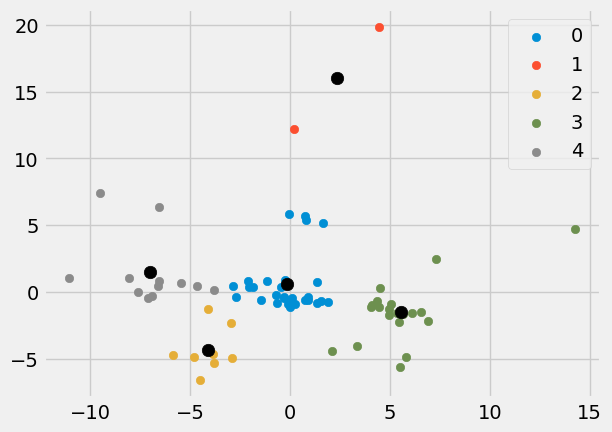

In [88]:
#Getting unique labels
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

#plotting the results:
for i in u_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [100]:
pd.set_option('display.max_columns', None)
df.iloc[:, 5:].groupby('label').mean()

,SUM_ActiveEnergyBurned,SUM_BasalEnergyBurned,SUM_DistanceWalkingRunning,AVG_RunningGroundContactTime,AVG_RunningPower,AVG_RunningSpeed,AVG_RunningStrideLength,AVG_RunningVerticalOscillation,SD_RunningGroundContactTime,SD_RunningPower,SD_RunningSpeed,SD_RunningStrideLength,SD_RunningVerticalOscillation,ele_mean,ele_std,ele_p10,ele_p20,ele_p30,ele_p40,ele_p50,ele_p60,ele_p70,ele_p80,ele_p90,course_mean,course_std,course_p10,course_p20,course_p30,course_p40,course_p50,course_p60,course_p70,course_p80,course_p90,speed_mean,speed_std,speed_p10,speed_p20,speed_p30,speed_p40,speed_p50,speed_p60,speed_p70,speed_p80,speed_p90,hAcc_mean,hAcc_std,hAcc_p10,hAcc_p20,hAcc_p30,hAcc_p40,hAcc_p50,hAcc_p60,hAcc_p70,hAcc_p80,hAcc_p90,vAcc_mean,vAcc_std,vAcc_p10,vAcc_p20,vAcc_p30,vAcc_p40,vAcc_p50,vAcc_p60,vAcc_p70,vAcc_p80,vAcc_p90,HeartRate_mean,HeartRate_std,HeartRate_min,HeartRate_p10,HeartRate_p20,HeartRate_p30,HeartRate_p40,HeartRate_p50,HeartRate_p60,HeartRate_p70,HeartRate_p80,HeartRate_p90,HeartRate_max,HR_90-100,HR_100-110,HR_110-120,HR_120-125,HR_125-130,HR_130-135,HR_135-140,HR_140-145,HR_145-150,HR_150-155,HR_155-160,HR_160-165,HR_165-170,HR_170-175,HR_175-180,HR_180-185,HR_185-190,HR_190-195,HR_195-200,HR_200-250,duration_sec
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,464.287714,92.129750,6.060242,290.862465,205.456694,8.670085,0.893733,10.021160,10.129032,24.184932,0.719582,0.039956,0.281870,408.759800,10.218736,397.537190,399.272793,401.636685,404.090207,406.424439,409.148023,413.365816,418.588549,424.613450,175.698625,95.807470,61.071133,72.609313,89.197602,119.178125,169.485618,241.197317,252.005856,267.460257,297.665945,2.402150,0.290560,2.082360,2.231641,2.308936,2.369845,2.425547,2.478722,2.535903,2.604586,2.705337,1.588186,0.088062,1.550318,1.565094,1.572132,1.577876,1.583869,1.590338,1.598061,1.608433,1.624498,0.820756,0.054269,0.813187,0.816226,0.818178,0.819743,0.821047,0.822248,0.823399,0.824830,0.827653,139.883194,9.921507,107.352536,128.794964,133.868093,136.622843,138.890464,141.244411,143.320457,145.554514,147.291021,149.882064,155.760964,10.071429,28.750000,97.642857,109.750000,190.392857,308.535714,669.857143,738.928571,624.892857,243.464286,49.750000,38.714286,5.357143,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.0,3119.107143
1,471.126000,109.165000,13.963868,283.230300,215.318489,8.879130,0.923072,10.049313,3.871866,14.132102,0.605738,0.016085,0.116833,4.557040,1.742427,2.537142,3.098135,3.577301,3.958083,4.306038,4.869995,5.383127,5.823844,6.730698,173.757084,77.681958,80.074574,94.674485,120.493555,149.101978,196.450850,216.508587,228.692806,238.827383,256.479034,2.372645,0.644042,1.480507,2.060052,2.324854,2.453865,2.546693,2.625916,2.694480,2.777862,2.907571,1.985853,0.618702,1.557085,1.566801,1.580717,1.594704,1.618227,1.696530,2.207416,2.613325,2.921646,1.038884,0.346908,0.801260,0.814518,0.818586,0.823395,0.826426,0.901644,1.114951,1.379506,1.618093,135.161536,9.134242,121.495500,126.586100,130.320800,131.613950,132.540300,134.413250,136.999900,140.303650,143.066600,144.192300,145.482000,0.000000,0.000000,0.000000,2172.500000,592.000000,0.000000,1186.500000,1276.500000,1136.500000,248.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.0,6612.000000
2,327.623875,73.751500,4.246482,273.087538,234.442718,9.670663,0.881444,9.537895,30.290357,52.349222,2.199184,0.072817,0.418864,466.017952,1.536143,464.080213,464.535876,464.995809,465.487215,465.971321,466.339142,466.793715,467.268824,468.289126,173.273586,98.241388,59.458899,71.596546,74.814861,123.029680,180.374867,236.721116,251.374954,253.256844,299.346720,2.662397,0.703537,1.958854,2.110474,2.219160,2.333816,2.472926,2.779033,3.226042,3.386280,3.552207,1.229970,0.230493,1.080277,1.094949,1.108127,1.123118,1.133628,1.144834,1.157155,1.474018,1.629883,0.825310,0.051287,0.820972,0.822083,0.823318,0.824262,0.825085,0.825887,0.826655,0.827270,0.828065,146.746399,19.1606